#### scikit-learn
* train_test_split() : 훈련 데이터를 훈련 세트와 테스트 세트로 나누는 함수. 테스트 세트로 나눌 비율은 test_size 매개변수에서 지정할 수
있으며 기본값은 0.25(25%)
* kneighbors() : k-최근접 이웃 객체의 메서드. 입력한 데이터에 가장 가까운 이웃을 찾아 거리와 이웃 샘플의 인덱스를 반환

In [ ]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

#### 넘파이 배열을 사용해 데이터 준비

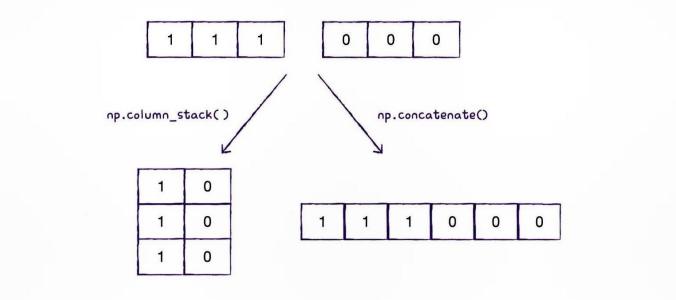

In [ ]:
import numpy as np
# column_stack() : 전달받은 리스트를 일렬로 세운 다음 차례대로 나란히 연결
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [ ]:
# np.ones()와 np.zeros() : 각각 원하는 개수의 1과 0을 채운 배열 생성
# np.concatenate () :첫 번째 차원을 따라 배열 연결
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


#### 사이킷런으로 훈련 세트와 테스트 세트 나누기

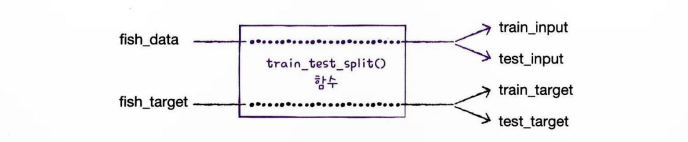

In [ ]:
from sklearn.model_selection import train_test_split

# stratify 매개변수에 타깃데이터를 전달하면 클래스 비율에 맞게 데이터 분리. 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 유용
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)

In [ ]:
# 입력 데이터의 크기 출력
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [ ]:
# 타깃 데이터의 크기 출력
print(train_target.shape, test_target.shape)

(36,) (13,)


In [ ]:
# k-최근접 이웃 훈련 및 모델 평가
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

In [ ]:
# 새로운 데이터 -> 도미로 예측되어야하는데 빙어로 예측됨
print(kn.predict([[25, 150]]))

[0.]


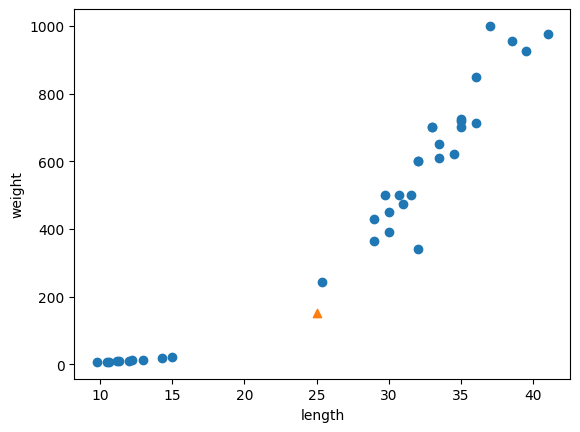

In [ ]:
# 새로운 데이터 산점도
import matplotlib.pyplot as plt

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# kneighbors() : 주어진 샘플에서 가장 가까운 이웃을 찾아 이웃까지의 거리와 이웃 샘플의 인덱스 반환
distances, indexes = kn.kneighbors([[25, 150]])
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


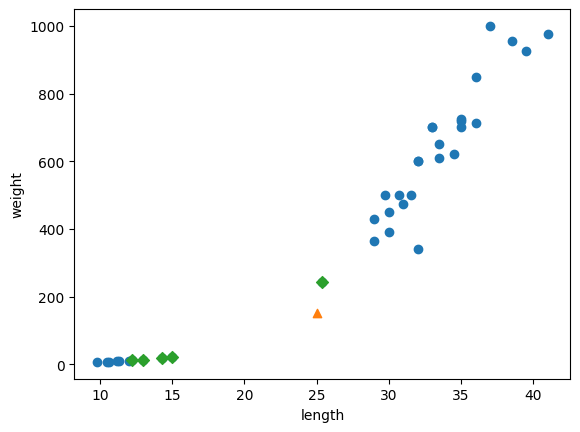

In [ ]:
# indexes 배열을 사용해 훈련 데이터 중에서 이웃 샘플을 따로 구분
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D') # 마름모
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# X축은 범위가 좁고(10〜40), y축은 범위가 넓음(0〜1000) 따라서 y축으로 조금만 멀어져도 거리가 아주 큰 값으로 계산되기 때문에 새로운 도미 샘플이 이웃으로 선택되지 못함
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


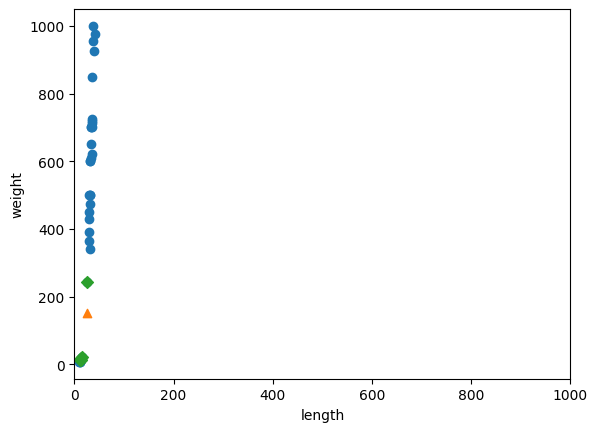

In [ ]:
# x축의 범위를 동일하게 0〜1,000으로 맞춰서 산점도 확인
# 생선의 길이 (x축）는 가장 가까운 이웃을 찾는 데 크게 영향을 미치지 못하고 생선의 무게 (y축）만 고려 대상이 된다는 걸 알 수 있음
# 두 특성（길이와 무게)의 값이 놓인 범위가 매우 다름 즉, 두 특성의 스케일이 다름 -> 알고리즘이 거리 기반일 경우 올바른 예측 불가
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# 표준점수(z 점수) : 각 특성값이 평균에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냄. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교 가능
# axis=0 : 행을 따라 각 열의 통계 값을 계산
mean = np.mean(train_input, axis=0) # 평균 계산
std = np.std(train_input, axis=0) # 표준편차 계산

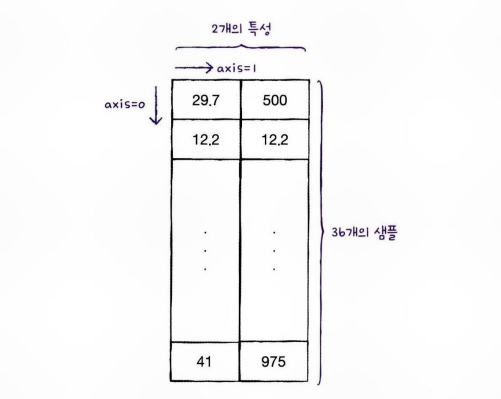

In [ ]:
# 표준화(데이터를 표준점수로 변환)
train_scaled = (train_input - mean) / std

##### 브로드캐스팅 : 크기가 다른 넘파이 배열에서 자동으로 사칙 연산을 모든 행이나 열로 확장하여 수행하는 기능

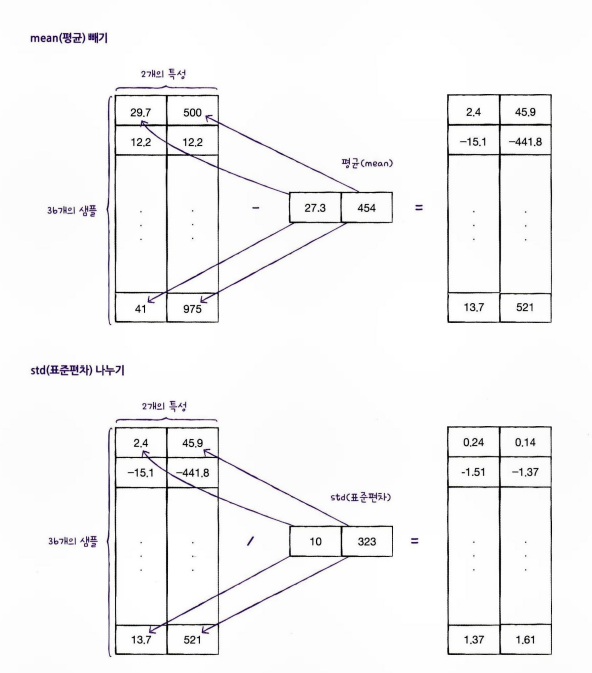

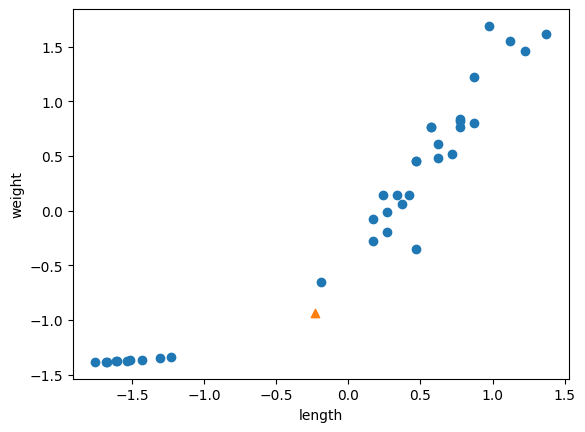

In [ ]:
# 표준화한 데이터로 산점도 그리기
new = ([25, 150] - mean) / std
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [ ]:
# k-최근접 이웃 모델 다시 훈련
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

In [ ]:
#테스트 세트 표준화 (훈련세트 기준으로 변환해야 함)
test_scaled = (test_input - mean) / std

In [ ]:
# 모델 평가
kn.score(test_scaled, test_target)

1.0

In [ ]:
# 새로운 데이터 다시 예측 -> 도미로 정상 예측
print(kn.predict([new]))

[1.]


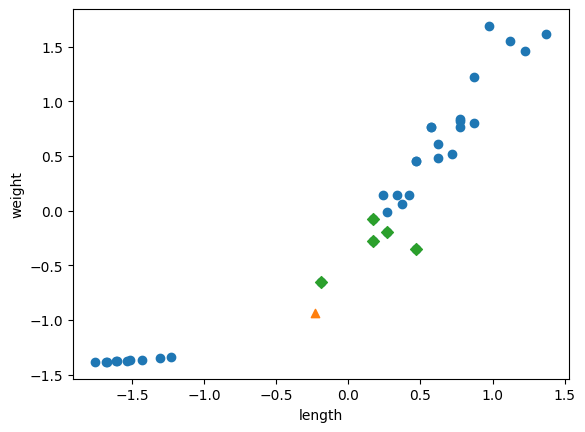

In [ ]:
# 최근접 이웃을 나타낸 산점도
distances, indexes = kn.kneighbors([new])
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()